In [123]:
import numpy as np
import plotnine as pn
import pandas as pd

In [124]:
# Simulate an atlas as a collection of points
# For simplicity use the real line.

In [125]:
# Then assign dates to each paper using exponential distribution,
# such that newer papers are exponentially more likely

In [126]:
# Then simulate calculating prior density
# density = k / arccos( cos(p_i, p_k) )

In [127]:
# Then plot the histogram of density. Is it normally distributed?

Given that almost all of these steps are available in sciterra Atlas and Cartography, it's probably best to create dummy vectorizer and dummy publications.

I.e. create serizalized identifiers, dummy abstracts, and a vectorizer that randomly generates a number between 0 and 1 (which is therefore automatically normed).

In [128]:
from sciterra.vectorization.vectorizer import Vectorizer

class DummyVectorizer(Vectorizer):
    def embed_documents(self, docs: list[str], batch_size: int = 64) -> dict[str, np.ndarray]:
        embedding_dim = 100
        embeddings = np.array([[np.random.rand() for _ in range(embedding_dim)] for _ in range(len(docs))])
        return {
                "embeddings": embeddings,
                "success_indices": np.arange(len(docs)),
                "fail_indices": np.array([])
            }

# Test
vec = DummyVectorizer()
result = vec.embed_documents(["dummy_text"]*128)
result['embeddings'].shape

(128, 100)

In [129]:
# Generate dummy publications

from sciterra import Publication
from datetime import datetime

def get_dummy_pubs(num_pubs: int, year: int, start_idx: int = 0) -> list[Publication]:
    publications = [
        Publication(
            dict(
                identifier=f"{start_idx + idx}",
                publication_date=datetime(
                    year=year,
                    # Dummy month day
                    month=1,
                    day=1,
                )
            )
        )
        for idx in range(num_pubs)
    ]
    return publications

# Test
pubs = get_dummy_pubs(100, 2022)
pubs[0].__dict__

{'_identifier': '0',
 '_abstract': None,
 '_publication_date': datetime.datetime(2022, 1, 1, 0, 0),
 '_citation_count': None,
 '_fields_of_study': None,
 '_citations': [],
 '_references': []}

In [140]:
def exp_population_growth(initial_population, years):
    doubling_time = 16
    growth_rate = 2 ** (years / doubling_time)
    final_population = initial_population * growth_rate
    return int(final_population)

def lin_population_growth(initial_population, years):
    growth_rate = 10
    final_population = initial_population + growth_rate * years
    return final_population

def log_population_growth(initial_population, years):
    max_population = 10000
    growth_rate = 0.1
    final_population = max_population / (1 + ((max_population / initial_population) - 1) * np.exp(-growth_rate * years))
    return final_population

In [131]:
# Create population(s) of publications, dated 
initial_population = 100
start = 1990
end = 2020
years = range(start, end+1)

pubs: list[Publication] = []
idx = 0
for year in years:
    # num_pubs = exp_population_growth(initial_population, year - start)
    # num_pubs = lin_population_growth(initial_population, year - start)
    num_pubs = log_population_growth(initial_population, year - start)
    pubs.extend(get_dummy_pubs(num_pubs, year, idx))
    idx += num_pubs


In [132]:
vec = DummyVectorizer()
embeddings = vec.embed_documents(["dummy_doc"]*len(pubs))["embeddings"]
embeddings[0]

array([0.35346555, 0.37916951, 0.18042993, 0.99500273, 0.12060471,
       0.46798299, 0.55903995, 0.71486701, 0.86267609, 0.42707342,
       0.29531777, 0.07018515, 0.30084698, 0.59243023, 0.00491936,
       0.59374035, 0.31347117, 0.48783479, 0.43864242, 0.26159047,
       0.07417344, 0.82371909, 0.6365423 , 0.04328651, 0.83563904,
       0.18771387, 0.22930493, 0.56888498, 0.20055128, 0.32058635,
       0.01444195, 0.36004473, 0.91955261, 0.84685527, 0.12232817,
       0.79933639, 0.92735663, 0.28980244, 0.84712914, 0.3402922 ,
       0.45041309, 0.2104408 , 0.91567376, 0.3868247 , 0.60134814,
       0.5234807 , 0.34791044, 0.62125964, 0.73118178, 0.42622951,
       0.2524455 , 0.75395778, 0.44305986, 0.82281295, 0.31539593,
       0.83828252, 0.51639009, 0.0995225 , 0.80210209, 0.53116966,
       0.43029635, 0.48916642, 0.2351589 , 0.0349412 , 0.48308252,
       0.15725543, 0.04945732, 0.45664753, 0.28053998, 0.14042789,
       0.42116637, 0.66101059, 0.62090853, 0.08853281, 0.64322

In [133]:
from sciterra import Atlas
from sciterra.vectorization.projection import Projection

proj = Projection(
    identifier_to_index={pub.identifier:int(pub.identifier) for pub in pubs},
    index_to_identifier=tuple([pub.identifier for pub in pubs]),
    embeddings=embeddings,
)

atl = Atlas(
    publications=pubs,
    projection=proj,
)
len(atl)

7750

In [134]:
embeddings.shape

(7750, 100)

In [135]:
embeddings[0], embeddings[-1]

(array([0.35346555, 0.37916951, 0.18042993, 0.99500273, 0.12060471,
        0.46798299, 0.55903995, 0.71486701, 0.86267609, 0.42707342,
        0.29531777, 0.07018515, 0.30084698, 0.59243023, 0.00491936,
        0.59374035, 0.31347117, 0.48783479, 0.43864242, 0.26159047,
        0.07417344, 0.82371909, 0.6365423 , 0.04328651, 0.83563904,
        0.18771387, 0.22930493, 0.56888498, 0.20055128, 0.32058635,
        0.01444195, 0.36004473, 0.91955261, 0.84685527, 0.12232817,
        0.79933639, 0.92735663, 0.28980244, 0.84712914, 0.3402922 ,
        0.45041309, 0.2104408 , 0.91567376, 0.3868247 , 0.60134814,
        0.5234807 , 0.34791044, 0.62125964, 0.73118178, 0.42622951,
        0.2524455 , 0.75395778, 0.44305986, 0.82281295, 0.31539593,
        0.83828252, 0.51639009, 0.0995225 , 0.80210209, 0.53116966,
        0.43029635, 0.48916642, 0.2351589 , 0.0349412 , 0.48308252,
        0.15725543, 0.04945732, 0.45664753, 0.28053998, 0.14042789,
        0.42116637, 0.66101059, 0.62090853, 0.08

In [136]:
# sanity check: 
from sklearn.metrics.pairwise import cosine_similarity

sims = cosine_similarity(embeddings, embeddings)
sims[0]

array([1.        , 0.75543976, 0.71463373, ..., 0.71364207, 0.75249232,
       0.76339048])

In [137]:
# Use Cartographer to measure density. This might involve adding dummy publication dates :/

from sciterra.mapping.cartography import Cartographer

crt = Cartographer(vectorizer=vec)
densities = crt.measure_topography(
    atl,
)

computing cosine similarity for 7750 embeddings with batch size 1000.


100%|██████████| 8/8 [00:00<00:00,  9.60it/s]


Computing ['density'] for 7750 publications.


100%|██████████| 7750/7750 [00:01<00:00, 4020.18it/s] 


In [138]:
# Plot density distribution
data = pd.DataFrame(
    densities,
    columns=["density"],
)
data.dropna(inplace=True)
data

,density
100,23.755131
101,24.155654
102,22.819804
103,22.796245
104,22.425112
...,...
7745,28.082803
7746,27.190347
7747,26.550689
7748,28.125486


'stat_bin()' using 'bins = 56'. Pick better value with 'binwidth'.


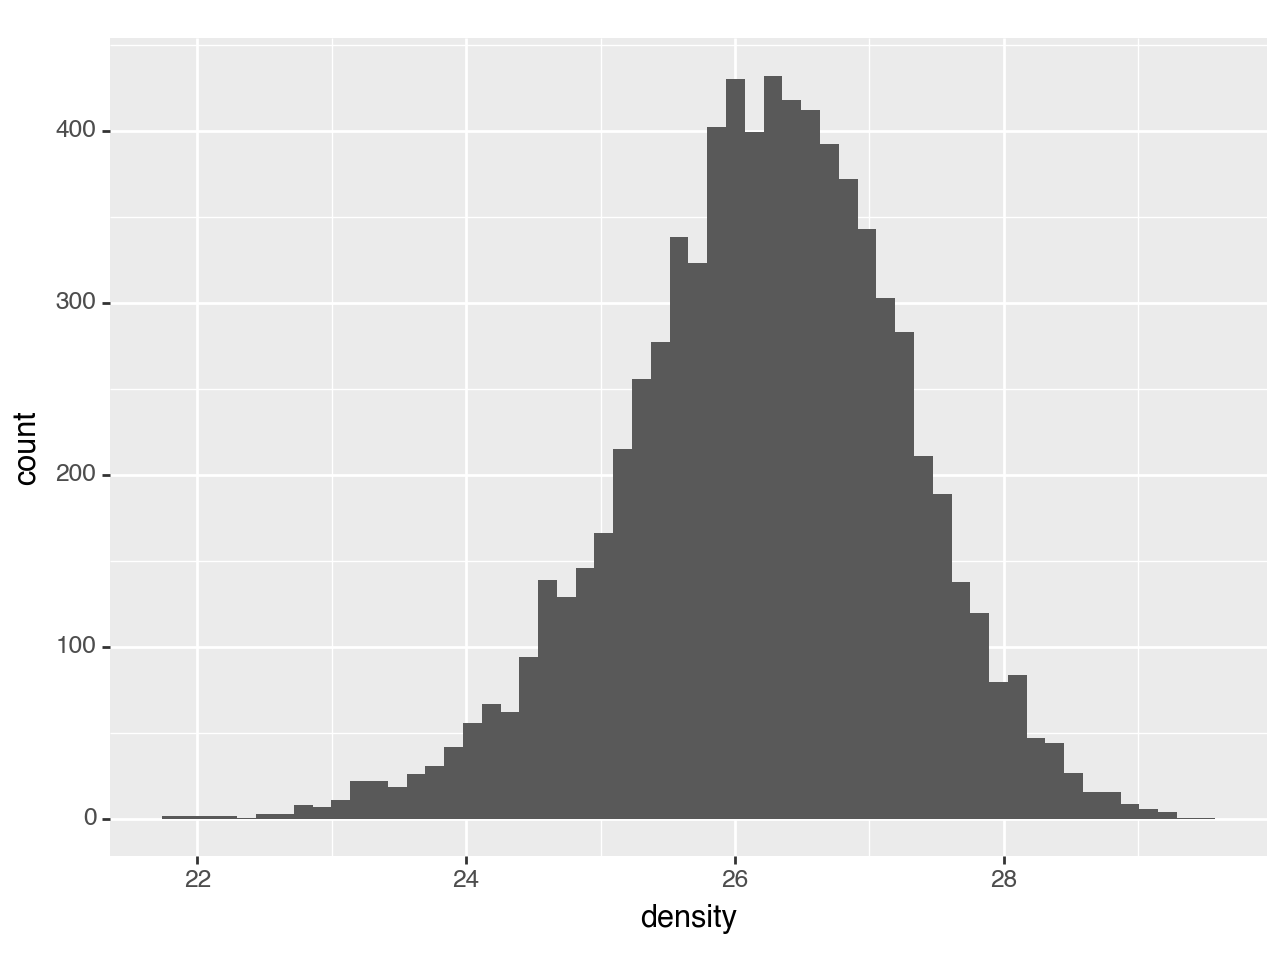

<Figure Size: (640 x 480)>

In [139]:
(
    pn.ggplot(
        data,
        pn.aes(x="density")
    )
    + pn.geom_histogram()
)